In [1]:
# Dan Collins - IS362 - Week 12 Assignment - Mushroom DataSet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
new_directory = r'C:\Users\dmcol\Documents\GitWork\IS362-W12-Assignment'

In [4]:
os.chdir(new_directory)

In [5]:
# Load the dataset file obtained from the mushroom.zip downloaded zip
df = pd.read_csv('agaricus-lepiota.data', header=None)

In [7]:
# Define the columns to select. 0 is for Edibility, 1 is for Cap-Shape, and 5 is for Odor.
columns_to_select = [0, 1, 5]

In [8]:
# Retrieve a subset of the columns and rename them
selected_df = df.iloc[:, columns_to_select]

In [13]:
# Rename the columns
selected_df.columns = ['Edibility', 'CapShape', 'Odor']

In [23]:
# NOTE: I understand the preferred way to include a multi-line comment in Python is to use triple quotes """,
# but I used only the # for better readability in Jupyter

# Below show the numeric mappings for each column's data values:
#
#Edibility has edible, poisonous, or unknown edibility
#	1 = Edible
#	2 = Poisonous
#	3 = Unknown Edibility
#    
#Cap-Shape has bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
#	1 = bell
#	2 = conical
#	3 = convex
#	4 = flat
#	5 = knobbed
#	6 = sunken
#    
#Odor has almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
#	1 = almond
#	2 = anise
#	3 = cresote
#	4 = fishy
#	5 = foul
#	6 = musty
#	7 = none
#	8 = pungent
#	9 = spicy

In [10]:
# Do the mapping
def map_values(column_name, value):
    selected_df.loc[:, 'Edibility'] = selected_df['Edibility'].apply(lambda x: map_values('Edibility', x))
    selected_df.loc[:, 'CapShape'] = selected_df['CapShape'].apply(lambda x: map_values('CapShape', x))
    selected_df.loc[:, 'Odor'] = selected_df['Odor'].apply(lambda x: map_values('Odor', x))

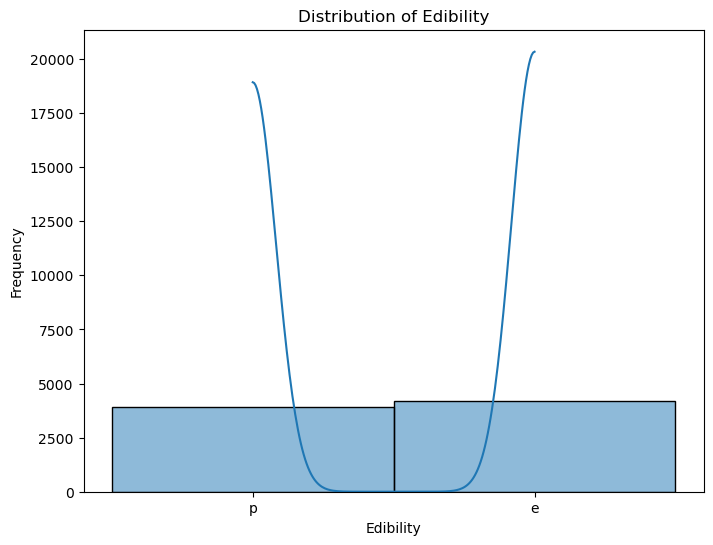

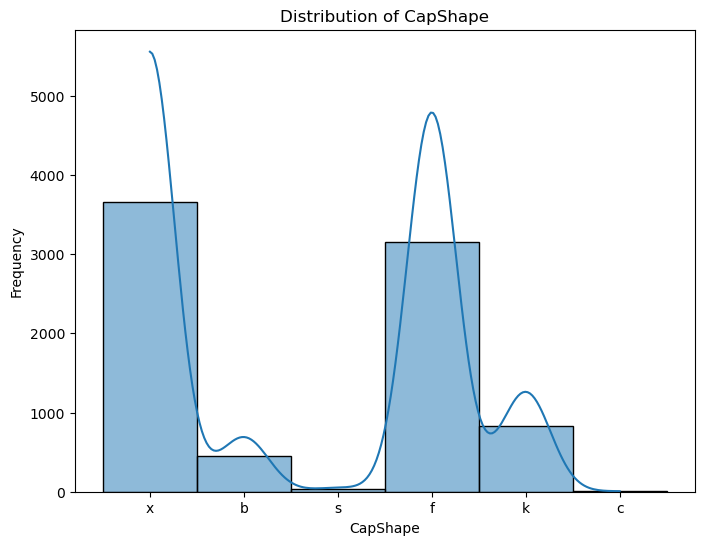

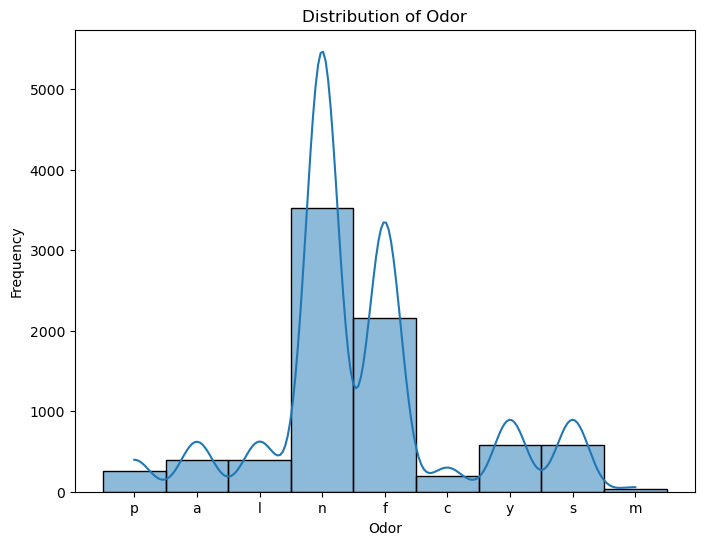

In [11]:
# Perform exploratory data analysis
for column in selected_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(selected_df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

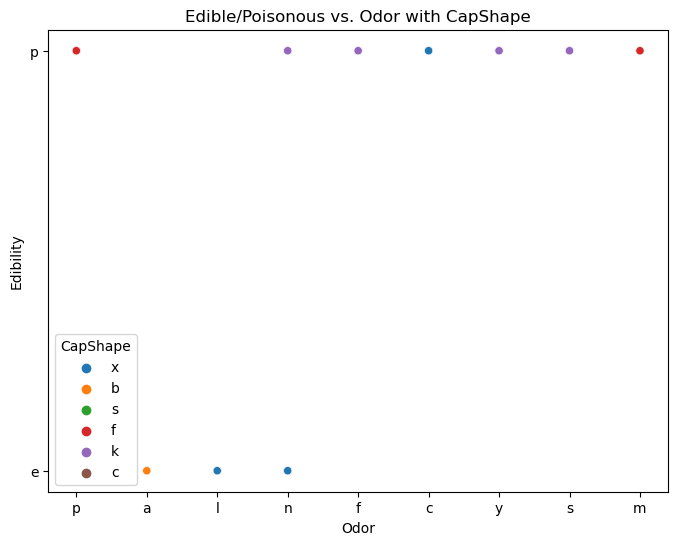

In [12]:
# Show scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=selected_df, x='Odor', y='Edibility', hue='CapShape')
plt.title('Edible/Poisonous vs. Odor with CapShape')
plt.xlabel('Odor')
plt.ylabel('Edibility')
plt.legend(title='CapShape')
plt.show()

In [ ]:
# I believe the scatter plot above reveals that there is a strong correlation between odor and edibility.
# There are many odors that seems to indicate whether a mushroom is poisonous.